In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Load the dataset from the file Ecommerce.csv

```
This dataset includes the following data for 200 online customers:

- Email
- Adress
- Avatar
- Avg Session Length (everage time they spent on usage)
- Time on App (time they spent using the application)
- Time on Website (time they spent using the website)
- Length of Membership (for how long they have been a user)
- Yearly Amount Spent (how much money they spend yearly)

Yout goal will be to estimate the value of the Yearly Amount Spent using the feature(s) of the users
```

In [19]:
data=pd.read_csv("Ecommerce.csv")
data

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872Lake Jamiefurt, U...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497West Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633South Chadburgh, TN...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808Brendachester, TX 0...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


### Get rid of non-numerical columns of the dataset

In [3]:
print(data.dtypes)
df=data.select_dtypes("float64")
df

Email                    object
Address                  object
Avatar                   object
Avg Session Length      float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object


,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


### Use Yearly Amount Spent as your target variable. Plot the relationship of each of the numerical features with the target variable

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


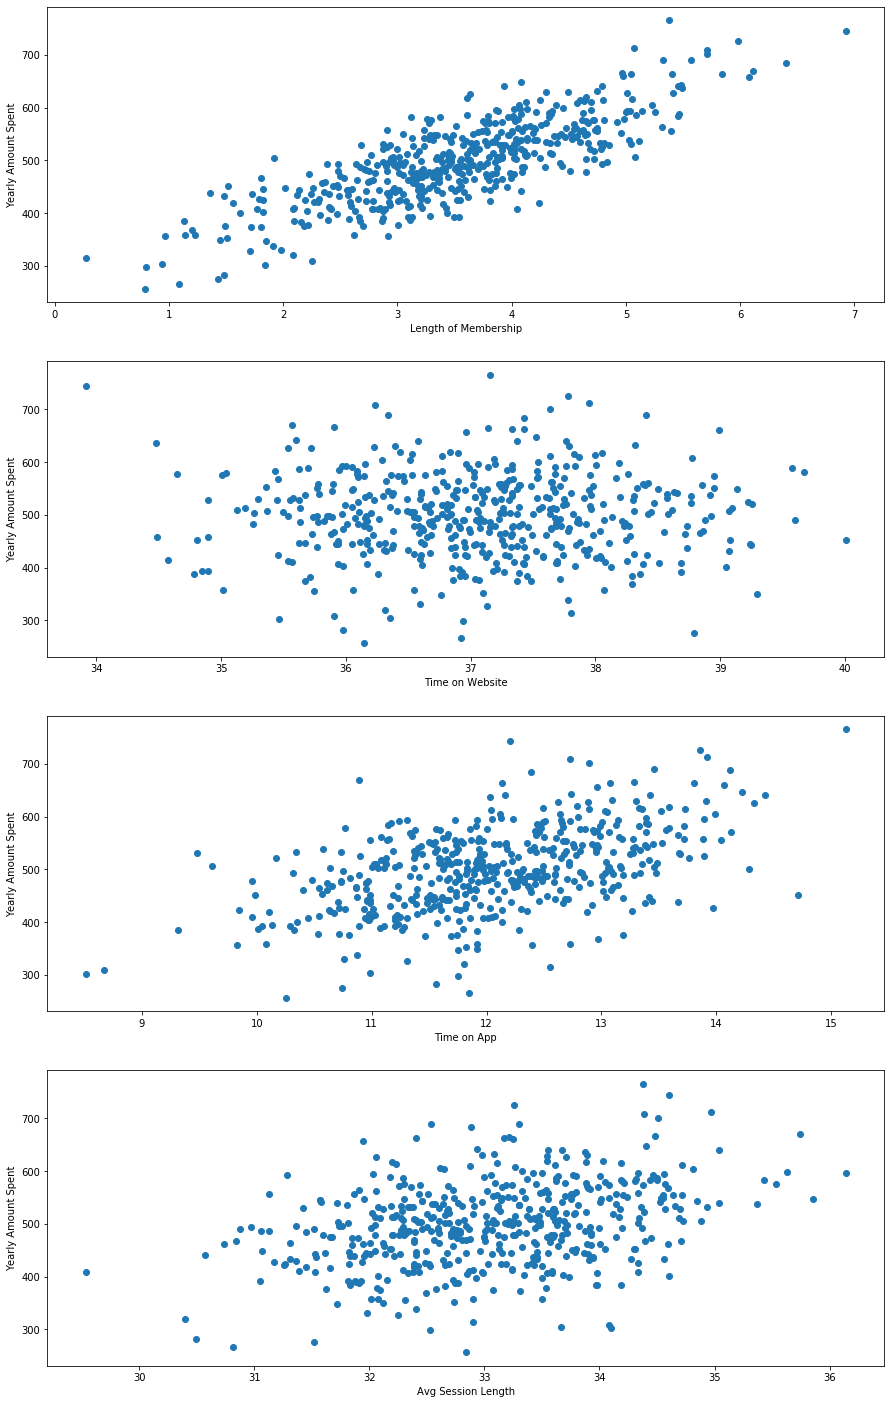

In [54]:
fig, axs = plt.subplots(4, 1)
fig.set_figwidth(15)
fig.set_figheight(25)

axs[0].scatter(df['Length of Membership'], df['Yearly Amount Spent'])
axs[0].set_xlabel('Length of Membership')
axs[0].set_ylabel('Yearly Amount Spent')

axs[1].scatter(df['Time on Website'], df['Yearly Amount Spent'])
axs[1].set_xlabel('Time on Website')
axs[1].set_ylabel('Yearly Amount Spent')

axs[2].scatter(df['Time on App'], df['Yearly Amount Spent'])
axs[2].set_xlabel('Time on App')
axs[2].set_ylabel('Yearly Amount Spent')

axs[3].scatter(df['Avg Session Length'], df['Yearly Amount Spent'])
axs[3].set_xlabel('Avg Session Length')
axs[3].set_ylabel('Yearly Amount Spent')

df.corr()

### Leave only one feature that has a linear relationship with the target variable.

In [22]:
newdf=df[["Yearly Amount Spent","Length of Membership"]]
newdf.rename(columns={"Yearly Amount Spent":"Y","Length of Membership":"X"},inplace=True)
newdf

,Y,X
0,587.951054,4.082621
1,392.204933,2.664034
2,487.547505,4.104543
3,581.852344,3.120179
4,599.406092,4.446308
...,...,...
495,573.847438,3.746573
496,529.049004,3.576526
497,551.620145,4.958264
498,456.469510,2.336485


### Divide the dataset into training and test sets with the ratio 80:20.

In [28]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
x_train, x_test, y_train, y_test = train_test_split(newdf[["X"]],newdf[['Y']], test_size=0.2, random_state=1)

### Use the resulting train and test sets with the next 2 functions to fit linear regression and plot the resulting regression line.

The first function is `fit_1d_linear_regression` that takes two vectors $x$ and $y$, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope. 

In [29]:
def fit_1d_linear_regression(data_vector, response_vector):
    import numpy as np
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    
    Note: You can avoid the intercept for simplicity 
    or include the intercept for an extra point
    """
    
    #TODO
    N=len(data_vector)
    x=data_vector.to_numpy()
    y=response_vector.to_numpy()
    
    beta1=(np.sum(np.multiply(x,y))-(1/N)*np.sum(x)*np.sum(y))/(np.sum(np.multiply(x,x))-(1/N)*np.sum(x)**2)
    beta0=(np.sum(y)-beta1*np.sum(x))/N
    
    return np.array([beta0,beta1])

In [30]:
beta=fit_1d_linear_regression(x_train,y_train)
print(beta[0],beta[1])

278.2610386849023 62.908055099440794


The second function is `plot_line` function, that takes $\beta_0, \beta_1, x, y$ and plots a scatter plot of the data, and the line $y = \beta_0 + \beta_1 x$. And saves the plot in `YOURNAME.png`

In [31]:
def plot_fitted_line(b0,
                     b1,
                     x,
                     y,
                     username: str):
    """
    :param b0: Intersept of line to plot
    Note: avoid this if you don't have an intercept in the previous function
    :param b1: Slope of the line to plot
    :param x: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x coordinates)
    :param y: A pandas series object (i.e. a column of a dataframe),
                        where each element is a label (y coordinates)
    """
    from matplotlib import pyplot as plt
    plt.scatter(x,y)
    plt.xlabel(df.columns[1])
    plt.ylabel(df.columns[0])
    plt.title("Regression line {} vs {} ".format(df.columns[1],df.columns[0]))
    plt.plot(x,b0+b1*x,color="red")
    
    plt.savefig('{}.png'.format(username))
    plt.show()

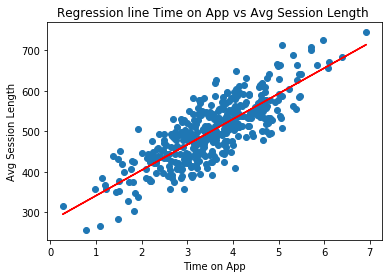

In [32]:
plot_fitted_line(beta[0],beta[1],x_train,y_train,username="test")

### Plot example

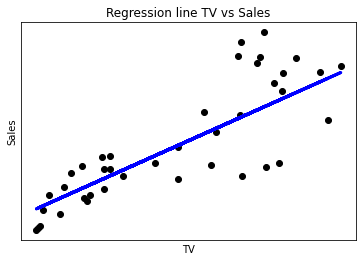

### Now fit the linear regression to the data containing only 1 feature using sklearn and compare the results with your own fit_1d_linear_regression function

In [51]:

def myFunc(features,label,test_size):
    x_train, x_test, y_train, y_test = train_test_split(features,label, test_size=test_size, random_state=1)
    reg = linear_model.LinearRegression()
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    
    print("coefficient=",reg.coef_, "intercept= ",reg.intercept_)
    
    print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
    print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
    print('Root mean squared error: %.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))
    print('R-squared: %.2f' % r2_score(y_test, y_pred))

### Use sklearn.metrics to calculate Mean absolute error, Mean squared error, Root mean squared error and R-squared for the results of your own function vs the sklearn regression results. Try to interprete your results.

In [54]:
myFunc(newdf[["X"]],newdf[["Y"]],0.2)
print(beta[1],beta[0])

coefficient= [[62.9080551]] intercept=  [278.26103868]
Mean absolute error: 38.88
Mean squared error: 2446.50
Root mean squared error: 49.46
R-squared: 0.67
62.908055099440794 278.2610386849023


### Fit linear regression to the data containing all numerical features using sklearn and use the same metrics to evaluate how good the model is.

In [55]:
myFunc(df[df.columns.difference(["Yearly Amount Spent"])],df["Yearly Amount Spent"], test_size=0.2)

coefficient= [25.78854257 61.49204989 38.85150472  0.25638467] intercept=  -1047.7392052636444
Mean absolute error: 6.82
Mean squared error: 78.30
Root mean squared error: 8.85
R-squared: 0.99
